In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[[-0.98561526  0.94015211 -0.48927073  0.03355666  0.00950478  0.46346754
  -0.99731955  0.63862712  0.41592389  0.82453627]]


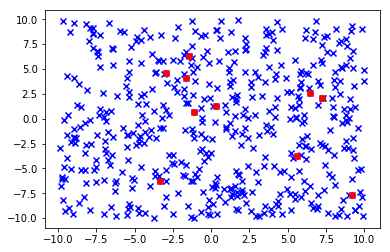

[[5.57937355]
 [5.57937355]
 [5.57937355]
 [5.57937355]
 [5.57937355]
 [5.57937355]
 [5.57937355]
 [5.57937355]
 [5.57937355]
 [5.57937355]]


In [3]:
x = np.random.uniform(-10,10,[500,1])
y = np.random.uniform(-10,10,[500,1])
z = np.c_[x,y]
#目標函數
target = (np.sin(x)*np.sin(y))/(x*y) 
centers = z[0:10,:]
d = np.zeros([centers.shape[0],centers.shape[0]])
#輸出值ouput
out_tmp = np.zeros([500,1])
for i in np.arange(0,centers.shape[0]):
            for j in np.arange(0,centers.shape[0]):
                d[i,j] = np.sqrt(np.sum((centers[i,:] - centers[j,:])**2, axis = 0))
delta = np.zeros([centers.shape[0],1]) + np.max(d)/np.sqrt(centers.shape[0])
#設定初始權重
w = np.random.uniform(-1,1,[10,1])
#設定學習率
learning_rate = 0.1
print(w.T)
plt.scatter(x,y,color='blue',marker='x')
plt.scatter(centers[:,0],centers[:,1],color='red',marker='o')
plt.show()
print(delta)

In [4]:
"""
delta高斯函数中的扩展参数
m中心的个数
w隐藏层到输出层的权重
"""
def __init__(m=10,delta=0.1):
    delta = delta
    hidden_number = m
    w = None
    pass
    
"""
计算输出值，使用高斯函数
"""
def calRBF(delta,x,c):   
    a = np.exp(-np.sum((x-c)**2)/(2*delta**2))
    return a
    
"""
输入层到隐藏层的特征转换
"""
def calG(hidden_number,x,centers):
    #500
    num = x.shape[0]
    #500*10
    G = np.empty((num,hidden_number))
    for i in np.arange(0,num):
        for j in np.arange(0,hidden_number):
            G[i,j] = calRBF(delta[j],x[i,:],centers[j,:])
    return G

def cal_d(hidden_number,x,centers):   
    num = x.shape[0]
    G = np.empty((num,hidden_number,2))
    for i in np.arange(0,num):
        for j in np.arange(0,hidden_number):
            G[i,j,:] = x[i,:]-centers[j,:]
    return G

def cal_l(hidden_number,x,centers):   
    num = x.shape[0]
    G = np.empty((num,hidden_number,2))
    for i in np.arange(0,num):
        for j in np.arange(0,hidden_number):
            G[i,j,:] = np.sum((x[i,:]-centers[j,:])**2)
    return G
    
"""
輸出
"""
def calY(x):
    num = z.shape[0]
    #空矩陣500*1
    Y = np.empty((num,1))
    #隱藏層輸出乘以權重
    Y = np.mean(x * w.T,axis=1).reshape(-1,1)
    return Y
    
"""
训练函数
"""  
def fit(x,y):
    pass


for i in np.arange(0,1000):
    counter = 0
    for j in np.arange(0,50):
        hid_out = calG(centers.shape[0],z[counter:counter+10,:],centers)
        out = calY(hid_out)
        e = target[counter:counter+10,:] - out

        """
        更新
        """
        #權重w變化量
        delta_w = learning_rate * np.mean(e * hid_out,axis = 0).reshape(-1,1)
        #中心店center變化量
        delta_c_x = learning_rate * np.mean(np.dot(e,(w/delta**2).T) * hid_out * cal_d(centers.shape[0],z[counter:counter+10,:],centers)[:,:,0],axis = 0)
        delta_c_y = learning_rate * np.mean(np.dot(e,(w/delta**2).T) * hid_out * cal_d(centers.shape[0],z[counter:counter+10,:],centers)[:,:,1],axis = 0)
        delta_c = np.c_[delta_c_x,delta_c_y]
        #標準差delta變化量
        delta_delta = learning_rate * np.mean(np.dot(e,(w/delta**3).T) * hid_out * cal_l(centers.shape[0],z[counter:counter+10,:],centers)[:,:,0],axis = 0).reshape(-1,1)
        #更新權重，中心店，標準差
        w += delta_w
        centers += delta_c
        delta += delta_delta
        out_tmp[counter:counter+10,:] = out
        counter += 10 
    if((i%100) == 0):  
        print(np.mean(e),i)


0.06010458200932846 0
0.043225491915702956 100
0.021953544915713462 200
0.009138710590412697 300
0.0010438934539406884 400
-0.0044954328280193715 500
-0.008362610195913755 600
-0.010817357747007003 700
-0.011972532195998942 800
-0.012003667366538035 900


(500, 1)


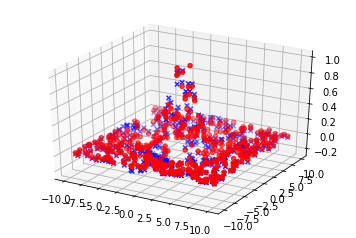

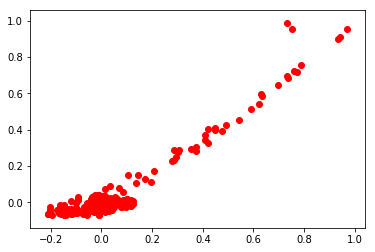

In [12]:
print(out_tmp.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#藍點目標點
ax.scatter(x,y,target,color='blue',marker='x')
#紅點輸出點
ax.scatter(x,y,out_tmp,color='r',marker='o')
plt.figure()
plt.scatter(target,out_tmp,color='red',marker='o')
plt.show()